C:\Users\Urban\AppData\Local\Temp\ipykernel_7816\1596341594.py:155: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_dataframe = pd.concat([


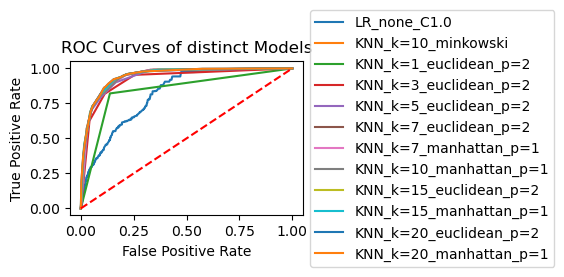


>>> Model: LR_none_C1.0


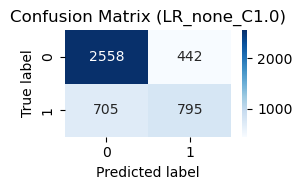

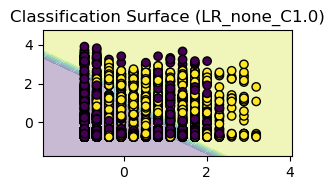


>>> Model: KNN_k=10_minkowski


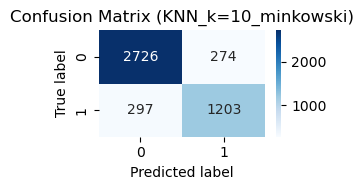

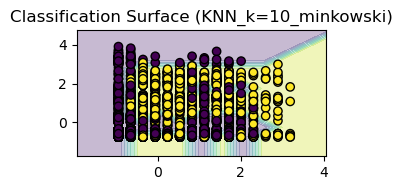


>>> Model: KNN_k=1_euclidean_p=2


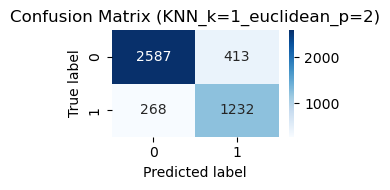

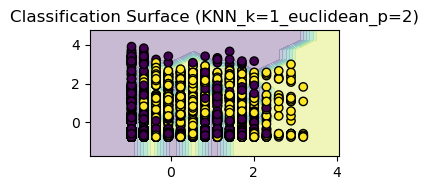


>>> Model: KNN_k=3_euclidean_p=2


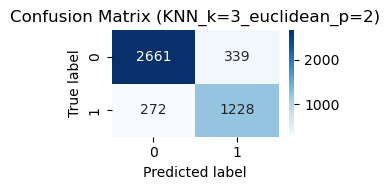

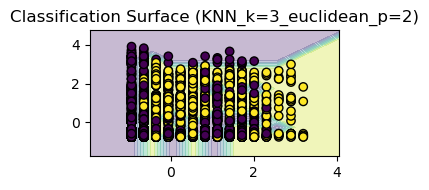


>>> Model: KNN_k=5_euclidean_p=2


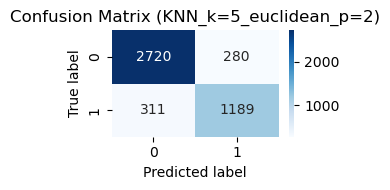

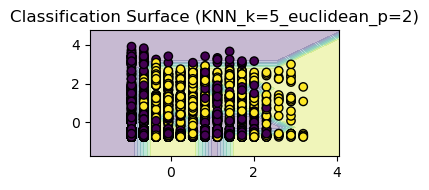


>>> Model: KNN_k=7_euclidean_p=2


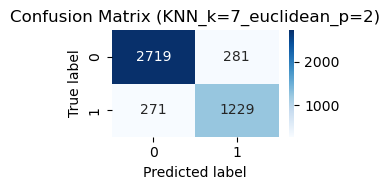

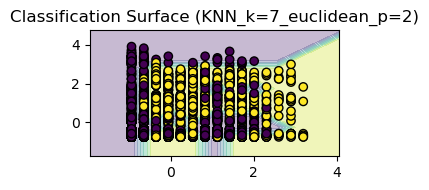


>>> Model: KNN_k=7_manhattan_p=1


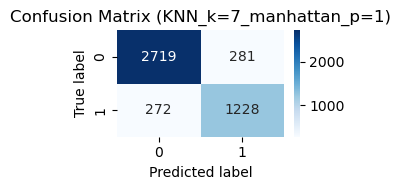

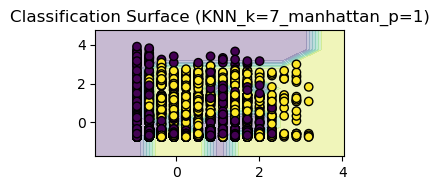


>>> Model: KNN_k=10_manhattan_p=1


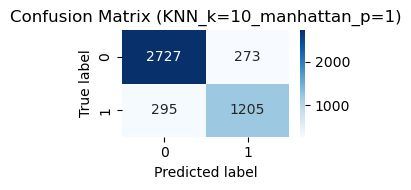

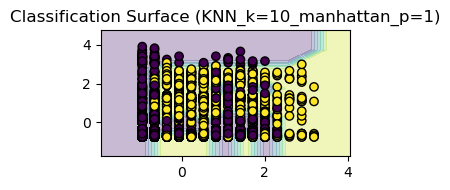


>>> Model: KNN_k=15_euclidean_p=2


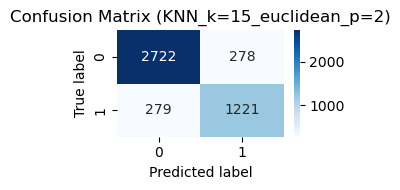

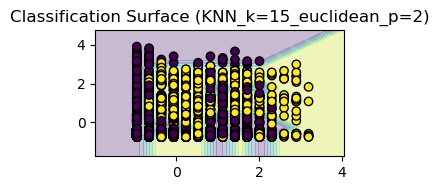


>>> Model: KNN_k=15_manhattan_p=1


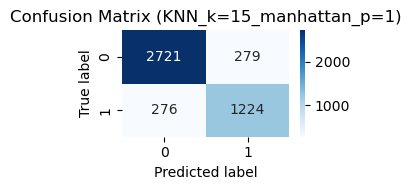

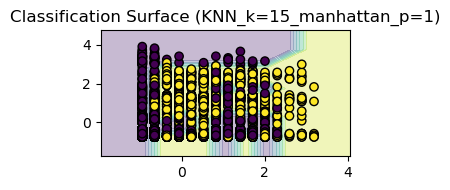


>>> Model: KNN_k=20_euclidean_p=2


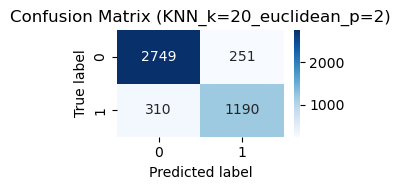

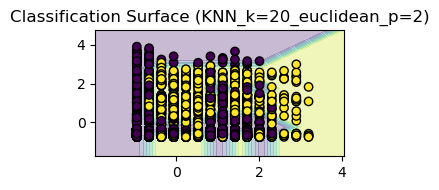


>>> Model: KNN_k=20_manhattan_p=1


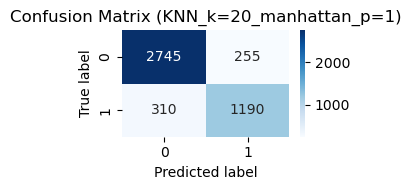

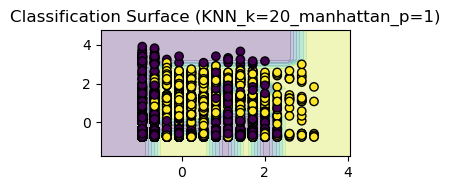


### Zestawienie metryk (bez duplikatów) ###



,Model,Params,Accuracy,Precision,Recall,F1_score,AUC
0,LR_none_C1.0,"{'penalty': None, 'C': 1.0}",0.745111,0.713313,0.691333,0.698894,0.816493
1,KNN_k=10_minkowski,"{'n_neighbors': 10, 'metric': 'minkowski', 'p'...",0.873111,0.858121,0.855333,0.856696,0.942804
2,KNN_k=1_euclidean_p=2,"{'n_neighbors': 1, 'metric': 'euclidean', 'p': 2}",0.848667,0.827533,0.841833,0.833577,0.841833
3,KNN_k=3_euclidean_p=2,"{'n_neighbors': 3, 'metric': 'euclidean', 'p': 2}",0.864222,0.845463,0.852833,0.848900,0.918663
4,KNN_k=5_euclidean_p=2,"{'n_neighbors': 5, 'metric': 'euclidean', 'p': 2}",0.868667,0.853394,0.849667,0.851475,0.934716
5,KNN_k=7_euclidean_p=2,"{'n_neighbors': 7, 'metric': 'euclidean', 'p': 2}",0.877333,0.861636,0.862833,0.862229,0.941814
6,KNN_k=7_manhattan_p=1,"{'n_neighbors': 7, 'metric': 'manhattan', 'p': 1}",0.877111,0.861422,0.862500,0.861956,0.941761
7,KNN_k=10_manhattan_p=1,"{'n_neighbors': 10, 'metric': 'manhattan', 'p'...",0.873778,0.858837,0.856167,0.857474,0.943080
8,KNN_k=15_euclidean_p=2,"{'n_neighbors': 15, 'metric': 'euclidean', 'p'...",0.876222,0.860787,0.860667,0.860727,0.945089
9,KNN_k=15_manhattan_p=1,"{'n_neighbors': 15, 'metric': 'manhattan', 'p'...",0.876667,0.861140,0.861500,0.861319,0.945201


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix, 
    roc_curve, 
    roc_auc_score
)
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

# --------------------
# 1. Wczytanie danych
# --------------------
diabetes = pd.read_csv('diabetes.csv')

features = [
    'Pregnancies','PlasmaGlucose','DiastolicBloodPressure',
    'TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age'
]
target = 'Diabetic'
X, y = diabetes[features], diabetes[target]

# Używamy tylko 2 cech
X_train, X_test, y_train, y_test = train_test_split(
    X[['Pregnancies', 'Age']], 
    y, 
    test_size=0.30, 
    random_state=0, 
    stratify=y
)

# -------------------
# 2. Standaryzacja
# -------------------
scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)

# -------------------
# 3. Struktury danych
# -------------------
metrics_dataframe = pd.DataFrame(
    columns=['Model', 'Params', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC']
)

stored_models = []
existing_metrics_set = set()  # Zbiór krotek z metrykami, by wykluczać duplikaty


# -----------------------------------------
# Funkcja do obliczania metryk (z poprzedniego kodu)
# -----------------------------------------
def get_metrics(model, X_checked, y_checked):
    y_pred = model.predict(X_checked)
    # Uwaga: niektóre modele (np. SVC bez probability=True) mogą nie mieć predict_proba
    # ale KNN i LogisticRegression mają, więc jest OK.
    y_proba = model.predict_proba(X_checked)[:, 1]
    
    report = classification_report(y_checked, y_pred, output_dict=True)
    accuracy = report['accuracy']
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1_metric = report['macro avg']['f1-score']
    auc_metric = roc_auc_score(y_checked, y_proba)
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1_metric,
        'auc': auc_metric,
        'y_pred': y_pred,
        'y_proba': y_proba
    }


# --------------------------
# Funkcje do rysowania metryk
# (z poprzedniego kodu)
# --------------------------
def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix ({model_name})")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

def plot_classification_surface(model, model_name, X_data, y_data):
    x_min, x_max = X_data[:, 0].min() - 1, X_data[:, 0].max() + 1
    y_min, y_max = X_data[:, 1].min() - 1, X_data[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.5),
        np.arange(y_min, y_max, 0.5)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(3, 2))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, edgecolors='k')
    plt.title(f"Classification Surface ({model_name})")
    plt.tight_layout()
    plt.show()

def plot_roc_curves(stored_models, X_test, y_test):
    plt.figure(figsize=(3, 2))
    for (model, name, _, y_proba) in stored_models:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=name)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title("ROC Curves of distinct Models")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()


# ----------------------------
# 4. Model bazowy (przykład LR)
# ----------------------------
base_model = LogisticRegression(
    penalty=None,
    C=1.0,
    solver='lbfgs',
    max_iter=15000,
    random_state=0
)
base_model.fit(X_train_standardized, y_train)

base_metrics = get_metrics(base_model, X_test_standardized, y_test)
base_model_name = "LR_none_C1.0"

base_metrics_tuple = (
    round(base_metrics['accuracy'], 4),
    round(base_metrics['precision'], 4),
    round(base_metrics['recall'], 4),
    round(base_metrics['f1'], 4),
    round(base_metrics['auc'], 4)
)
existing_metrics_set.add(base_metrics_tuple)

metrics_dataframe = pd.concat([
    metrics_dataframe,
    pd.DataFrame([{
        'Model': base_model_name,
        'Params': {'penalty': None, 'C': 1.0},
        'Accuracy': base_metrics['accuracy'],
        'Precision': base_metrics['precision'],
        'Recall': base_metrics['recall'],
        'F1_score': base_metrics['f1'],
        'AUC': base_metrics['auc'],
    }])
], ignore_index=True)

stored_models.append(
    (base_model, base_model_name, base_metrics['y_pred'], base_metrics['y_proba'])
)


# --------------------------------------------------
# 5. Bliźniaczy kod dla modelu bazowego KNeighborsClassifier
# --------------------------------------------------

# 5.1. Tworzymy bazowy model k-NN
#    n_neighbors = int(X_train_standardized.shape[0]*0.001)
#    (jeśli X_train ma np. 400 wierszy, to n_neighbors ~ 0.4, co da 0 - raczej warto
#     ustawić minimalnie 1)
n_neighbors_base = max(int(X_train_standardized.shape[0]*0.001), 1)

base_knn_model = KNeighborsClassifier(
    n_neighbors=n_neighbors_base,
    metric='minkowski',  # domyślnie Minkowski z p=2 to tzw. "euclidean"
    p=2
)
base_knn_model.fit(X_train_standardized, y_train)

# 5.2. Wyliczamy metryki
base_knn_metrics = get_metrics(base_knn_model, X_test_standardized, y_test)
base_knn_model_name = f"KNN_k={n_neighbors_base}_minkowski"

base_knn_metrics_tuple = (
    round(base_knn_metrics['accuracy'], 4),
    round(base_knn_metrics['precision'], 4),
    round(base_knn_metrics['recall'], 4),
    round(base_knn_metrics['f1'], 4),
    round(base_knn_metrics['auc'], 4)
)
existing_metrics_set.add(base_knn_metrics_tuple)

metrics_dataframe = pd.concat([
    metrics_dataframe,
    pd.DataFrame([{
        'Model': base_knn_model_name,
        'Params': {
            'n_neighbors': n_neighbors_base,
            'metric': 'minkowski',
            'p': 2
        },
        'Accuracy': base_knn_metrics['accuracy'],
        'Precision': base_knn_metrics['precision'],
        'Recall': base_knn_metrics['recall'],
        'F1_score': base_knn_metrics['f1'],
        'AUC': base_knn_metrics['auc'],
    }])
], ignore_index=True)

stored_models.append(
    (base_knn_model, base_knn_model_name, base_knn_metrics['y_pred'], base_knn_metrics['y_proba'])
)


# -------------------------------------------
# 6. Funkcja "train_and_store_knn"
#    (analogiczna do train_and_store z LR)
# -------------------------------------------
def train_and_store_knn(
    n_neighbors,
    metric,
    p,
    X_train_std,
    y_train,
    X_test_std,
    y_test
):
    global metrics_dataframe, stored_models, existing_metrics_set
    
    model = KNeighborsClassifier(
        n_neighbors=n_neighbors,
        metric=metric,
        p=p
    )
    model.fit(X_train_std, y_train)
    
    # Wyliczamy metryki
    metrics = get_metrics(model, X_test_std, y_test)
    metrics_tuple = (
        round(metrics['accuracy'], 4),
        round(metrics['precision'], 4),
        round(metrics['recall'], 4),
        round(metrics['f1'], 4),
        round(metrics['auc'], 4)
    )
    
    # Jeżeli taki zestaw metryk już istnieje w existing_metrics_set -> pomijamy
    if metrics_tuple in existing_metrics_set:
        return
    
    # W przeciwnym razie dopisujemy do DF i do stored_models
    existing_metrics_set.add(metrics_tuple)
    
    model_name = f"KNN_k={n_neighbors}_{metric}_p={p}"
    
    new_row = {
        'Model': model_name,
        'Params': {'n_neighbors': n_neighbors, 'metric': metric, 'p': p},
        'Accuracy': metrics['accuracy'],
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'F1_score': metrics['f1'],
        'AUC': metrics['auc'],
    }
    
    metrics_dataframe = pd.concat([
        metrics_dataframe,
        pd.DataFrame([new_row])
    ], ignore_index=True)
    metrics_dataframe.dropna(axis=1, how='all', inplace=True)
    
    stored_models.append(
        (model, model_name, metrics['y_pred'], metrics['y_proba'])
    )


# -------------------------------------------------------------
# 7. Pętla po różnych k (n_neighbors) i metrykach odległości
# -------------------------------------------------------------

neighbors_list = [1, 3, 5, 7, 10, 15, 20]  # przykładowe wartości k
metrics_list = ['euclidean', 'manhattan', 'minkowski']  # przykładowe metryki
p_list = [1, 2]  # Minkowski z p=1 to Manhattan, a p=2 to Euclidean,
                 # ale 'metric' można też podawać wprost jako 'manhattan'/'euclidean'.

for k in neighbors_list:
    for metric in metrics_list:
        # Przy metric='minkowski' dobrze określić p (1 lub 2)
        # Jeśli metric to strictly 'euclidean', p=2 jest domyślne, ale my możemy
        # zachować spójność i po prostu pętlować.
        # Uwaga: jeżeli metric='euclidean', to scikit-learn i tak ustawia p=2;
        #        jeżeli metric='manhattan', to p=1 itd.
        #        Ale żeby się "nie gryzło", możemy ustawiać w pętli tylko wtedy,
        #        gdy metric='minkowski'.
        #
        if metric == 'minkowski':
            for p_val in p_list:
                train_and_store_knn(
                    n_neighbors=k,
                    metric=metric,
                    p=p_val,
                    X_train_std=X_train_standardized,
                    y_train=y_train,
                    X_test_std=X_test_standardized,
                    y_test=y_test
                )
        else:
            # Dla 'euclidean' czy 'manhattan' p nie ma wpływu, bo jest narzucony z góry.
            # Ale żeby nie wywoływać błędów, musimy go jakoś ustawić.
            # Najprościej: p=2 dla euclidean i p=1 dla manhattan,
            # lub p=2 dla wszystkich, skoro i tak jest nadpisany przez 'metric'.
            p_val = 2 if metric == 'euclidean' else 1
            train_and_store_knn(
                n_neighbors=k,
                metric=metric,
                p=p_val,
                X_train_std=X_train_standardized,
                y_train=y_train,
                X_test_std=X_test_standardized,
                y_test=y_test
            )


# ------------------------------------------
# 8. Wyświetlenie wybranych wyników
# ------------------------------------------

# Zbiorczy wykres ROC dla *unikalnych* modeli
plot_roc_curves(stored_models, X_test_standardized, y_test)

# Dla *unikalnych* modeli rysujemy CM i surface:
for (model, model_name, y_pred, y_proba) in stored_models:
    print(f"\n>>> Model: {model_name}")
    plot_confusion_matrix(model_name, y_test, y_pred)
    plot_classification_surface(model, model_name, X_test_standardized, y_test)

print("\n### Zestawienie metryk (bez duplikatów) ###\n")
metrics_dataframe